# Decision Trees

Decision Trees are a non-parametric supervised learning method used for **classification** and **regession**. The process of constructing a decision tree is loosely based on the concepts of **information entropy and information gain** from information theory. A decision tree is a graph that describes a model of decisions and their possible consequences. An internal node in a decision tree represents a decision, or rather a condition of a particular feature in the context of classification. It has two possible outcomes that are represented by the left and right subtrees of the node. Of course, a node in the decision tree coul also have more than two subtrees. Each leaf node represents a particular class.

There are actually several algorithms that are used to construct a decision tree from some training data. Generally, the tree is constructed by splitting the set of sample values in the training data into smaller subsets based on an attribute value test. The process is repeated in each subset until splitting a given subset of sample values no longer adds internal nodes to the decision tree.

Once a decision tree has been created, we can optionally perform **pruning** on the tree. Pruning is simply the process of removing any extraneous decision nodes from the tree. This can be thought as a form for the regularization of decision tree through which we prevent underfitting or overfitting of the estimated decision tree model.

**One major advantage of decision trees are they are fast in training and prediction, but they are sensitive to small changes in the data; and often overfit the given data set.**

Tree ensemble methods algorithms such as random forests and boosting are among the top performers for classification and regression tasks.

**J48** is an open source implementation of the **C4.5** algorithm in Java.

**Pros** 
* Computationally cheap to use.
* Do not require feature scaling
* Easy for humans to understand learned results (interpretability). It is a **white box model**. On the other hand, **ANN** are **black box models**.
* Missing values OK, can deal with irrelevant features.
* Requires litte data preparation. Other techniques often require data normalisation.
* The cost of predicting with the tree is **logarithmic** in the number of data points used to train the tree.
* Able to handle both numerical and categorical data
* Able to handle **multioutput**/**multiclass** problems.
* Possible to validate a model using statistical tests.


**Cons**
* Prone to overfitting. Algorighms can create over-complex trees that do not generalise the data well. Mechanisms such as **pruning** can avoid this problem.
* Decision trees can be **unstable** because small variations in the data migh result in completely different tree being generated.
* The problem of learning an optimal decision tree is **NP-complete**. Consequently, practical decision-tree algorighms are based on heuristic algorithms such as the **greedy algorithm** where locally optimal decisions are made at each node. This can be mitigated using ensemble methods.
* There are concepts that are hard to learn because decision trees do not express them easily, for example, XOR.
* It is recommended to balance the dataset prior to fitting with the decision tree.


**Works with**: Numeric values and  nominal values.

## Maximizing Information Gain
We need to define an **objective function** that we want to optimize via the tree learning algorithm. In this case, the function is to maximize the **information gain** at each split. For simplicity and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees.

The **node impurity** is a measure of the homogeneity of the labels at the node. The three impurity criteria that are commonly used in binary decision trees are **Gini index**, **entropy**, and the **classification error**. For regression we can use **variance** as impurity measure.

In practice both the Gini index and entropy typycally yoield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

## Stopping Rule
The recursive tree construction is stopped at a node when one of the following conditions is met:
1. The node depth is equal to a *maxDepth* parameter
2. No split candidate leads to an information gain greater than a *minInfoGain* parameter
3. No split candidate produces child nodes which each have at least *minInstancesPerNode* training instances.
3. Class distribution of instances are independent of the available features (chi-square test)

In [2]:
# Function to calculate the Shannon Entropy of a dataset
from math import log
import operator

def calcShannonEnt(dataset):
    numEntries = len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1] 
        #print currentLabel
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
            
    #print labelCounts
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        #print prob
        shannonEnt -= prob * log(prob,2)
        
    return shannonEnt

def splitDataSet(dataset, axis, value):
    retDataSet = []
    for featVec in dataset:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def createTree(dataset, labels):
    classList = [example[-1] for example in dataset]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataset[0]) == 1:
        return majorityCnt(classList)
    bestFeature = chooseBestFeatureToSplit(dataset)
    bestFeatureLabel = labels[bestFeature]
    myTree = {bestFeatureLabel: {}}
    del(labels[bestFeature])
    featValues = [example[bestFeature] for example in dataset]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatureLabel][value] = createTree(splitDataSet\
                                                    (dataset, bestFeature, value), subLabels)
    return myTree

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 1
        else:
            classList[vote] +=1
    

def chooseBestFeatureToSplit(dataset):
    numFeatures = len(dataset[0]) - 1
    baseEntropy = calcShannonEnt(dataset)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataset]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataset, i, value)
            prob = len(subDataSet)/float(len(dataset))
            newEntropy += prob * calcShannonEnt(subDataSet)

        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i

    return bestFeature

def createDataSet():
    dataset = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no'],]

    labels = ['no surfacing', 'flippers']

    return dataset, labels

In [3]:
myDat, labels = createDataSet()

In [4]:
calcShannonEnt(myDat)

0.9709505944546686

In [5]:
myDat[0][-1] = 'maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [6]:
splitDataSet(myDat, 0, 1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [7]:
chooseBestFeatureToSplit(myDat)

0

In [8]:
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## Training a Decision Tree via scikit-learn

In [4]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Normal Standard deviation of u and sigma parameters
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
# eta0 = learning rate
# n_iter = number of epochs (passes over the training set)
# Random state is used for reproducibility of the initial shuffiling
# of the training dataset
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, tree.predict(X_test_std)))

Accuracy: 0.98


In [13]:
from plotting import *

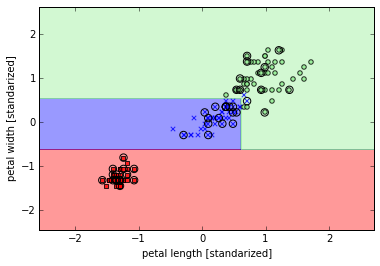

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=tree,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

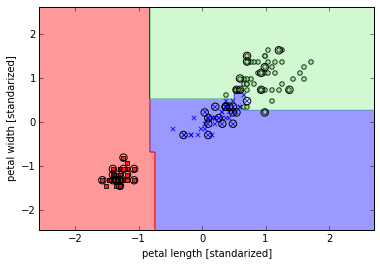

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=forest,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

### Plot the decision surface of a decision tree on the iris dataset
Source: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

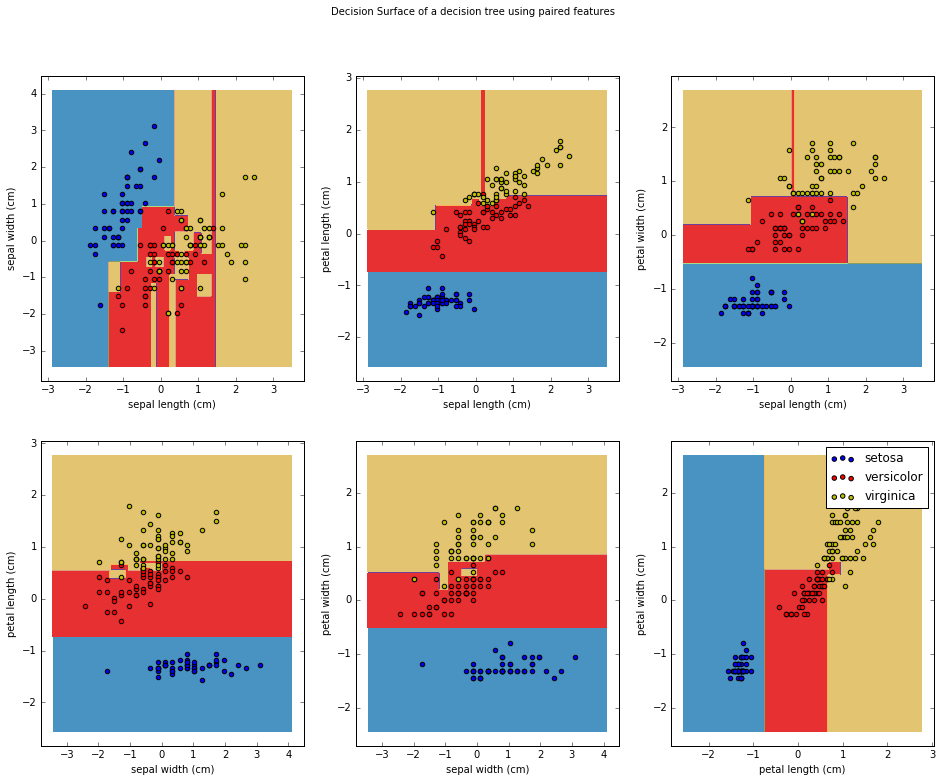

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# data
iris = load_iris()
plt.figure(figsize=(16,12))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    # standarize
    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std
    
    # Train
    clf = DecisionTreeClassifier().fit(X,y)
    
    # Plot the decision Boundary
    plt.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                   cmap = plt.cm.Paired)
    
    plt.axis("tight")

plt.legend()
plt.suptitle("Decision Surface of a decision tree using paired features")
plt.show()